## Introducción

En este notebook vamos a analizar el dataset 'Breast Cancer Wisconsin (Diagnostic) Data Set' de Kaggle, llamado 'data_cancer.csv'. El objetivo de este notebook es crear un modelo de regresión logística para predecir si las personas tienen un cáncer maligno o benigno. Para realizar el análisis y el modelo, vamos a importar las librerías que están en el siguiente bloque de código.

In [ ]:
# Limpieza, análisis y visualización de datos
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# División de los datos
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Escalabilidad y creación del modelo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluación del modelo
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## Carga y exploración inicial de los datos

In [4]:
df = pd.read_csv('../Data/data_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
print('Cantidad de filas y columnas:', df.shape)
print(df.info())

Cantidad de filas y columnas: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Al cargar los datos, vemos que el dataset tiene 569 filas y 32 columnas. La columna 'diagnosis' es la variable objetivo, la cual indica si el cáncer es maligno (M) o benigno (B). Las demás columnas son variables numéricas que describen características del tumor, lo cual nos funcionará para realizar todo el análisis necesario.

## Valores nulos y duplicados

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

Podemos ver que en el dataset únicamente la columna 'Unnamed: 32' tiene todos sus valores como nulos y ninguna columna tiene valores duplicados.

### Eliminación de tablas

In [11]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True) 

Eliminamos la columna 'id' ya que no aporta al objetivo del análisis; también se elimina la columna 'Unnamed: 32' por ser la única que tiene valores nulos.

## Análisis exploratorio

### Análisis univariable

Primeramente, vamos a ver la cantidad de datos recolectados entre el tipo de cáncer benigno y maligno para ver si hay más valores en uno que en otro.

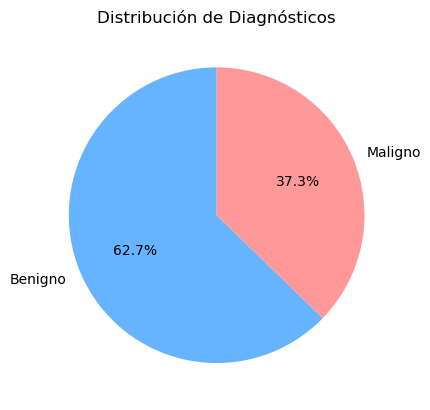

In [12]:
plt.pie(df['diagnosis'].value_counts(), labels = ['Benigno', 'Maligno'],
        autopct='%1.1f%%', startangle=90, colors = ['#66b3ff','#ff9999'])
plt.title('Distribución de Diagnósticos')
plt.show()

Vemos que hay un desbalance considerable en los datos, los cuales pueden traer problemas para el modelo al intentar predecir el tipo de cáncer maligno.

Ahora, veremos la distribución que tiene cada variable numérica en el dataset, para ver la inconsistencia de los datos y si es necesario hacer alguna transformación en estos.

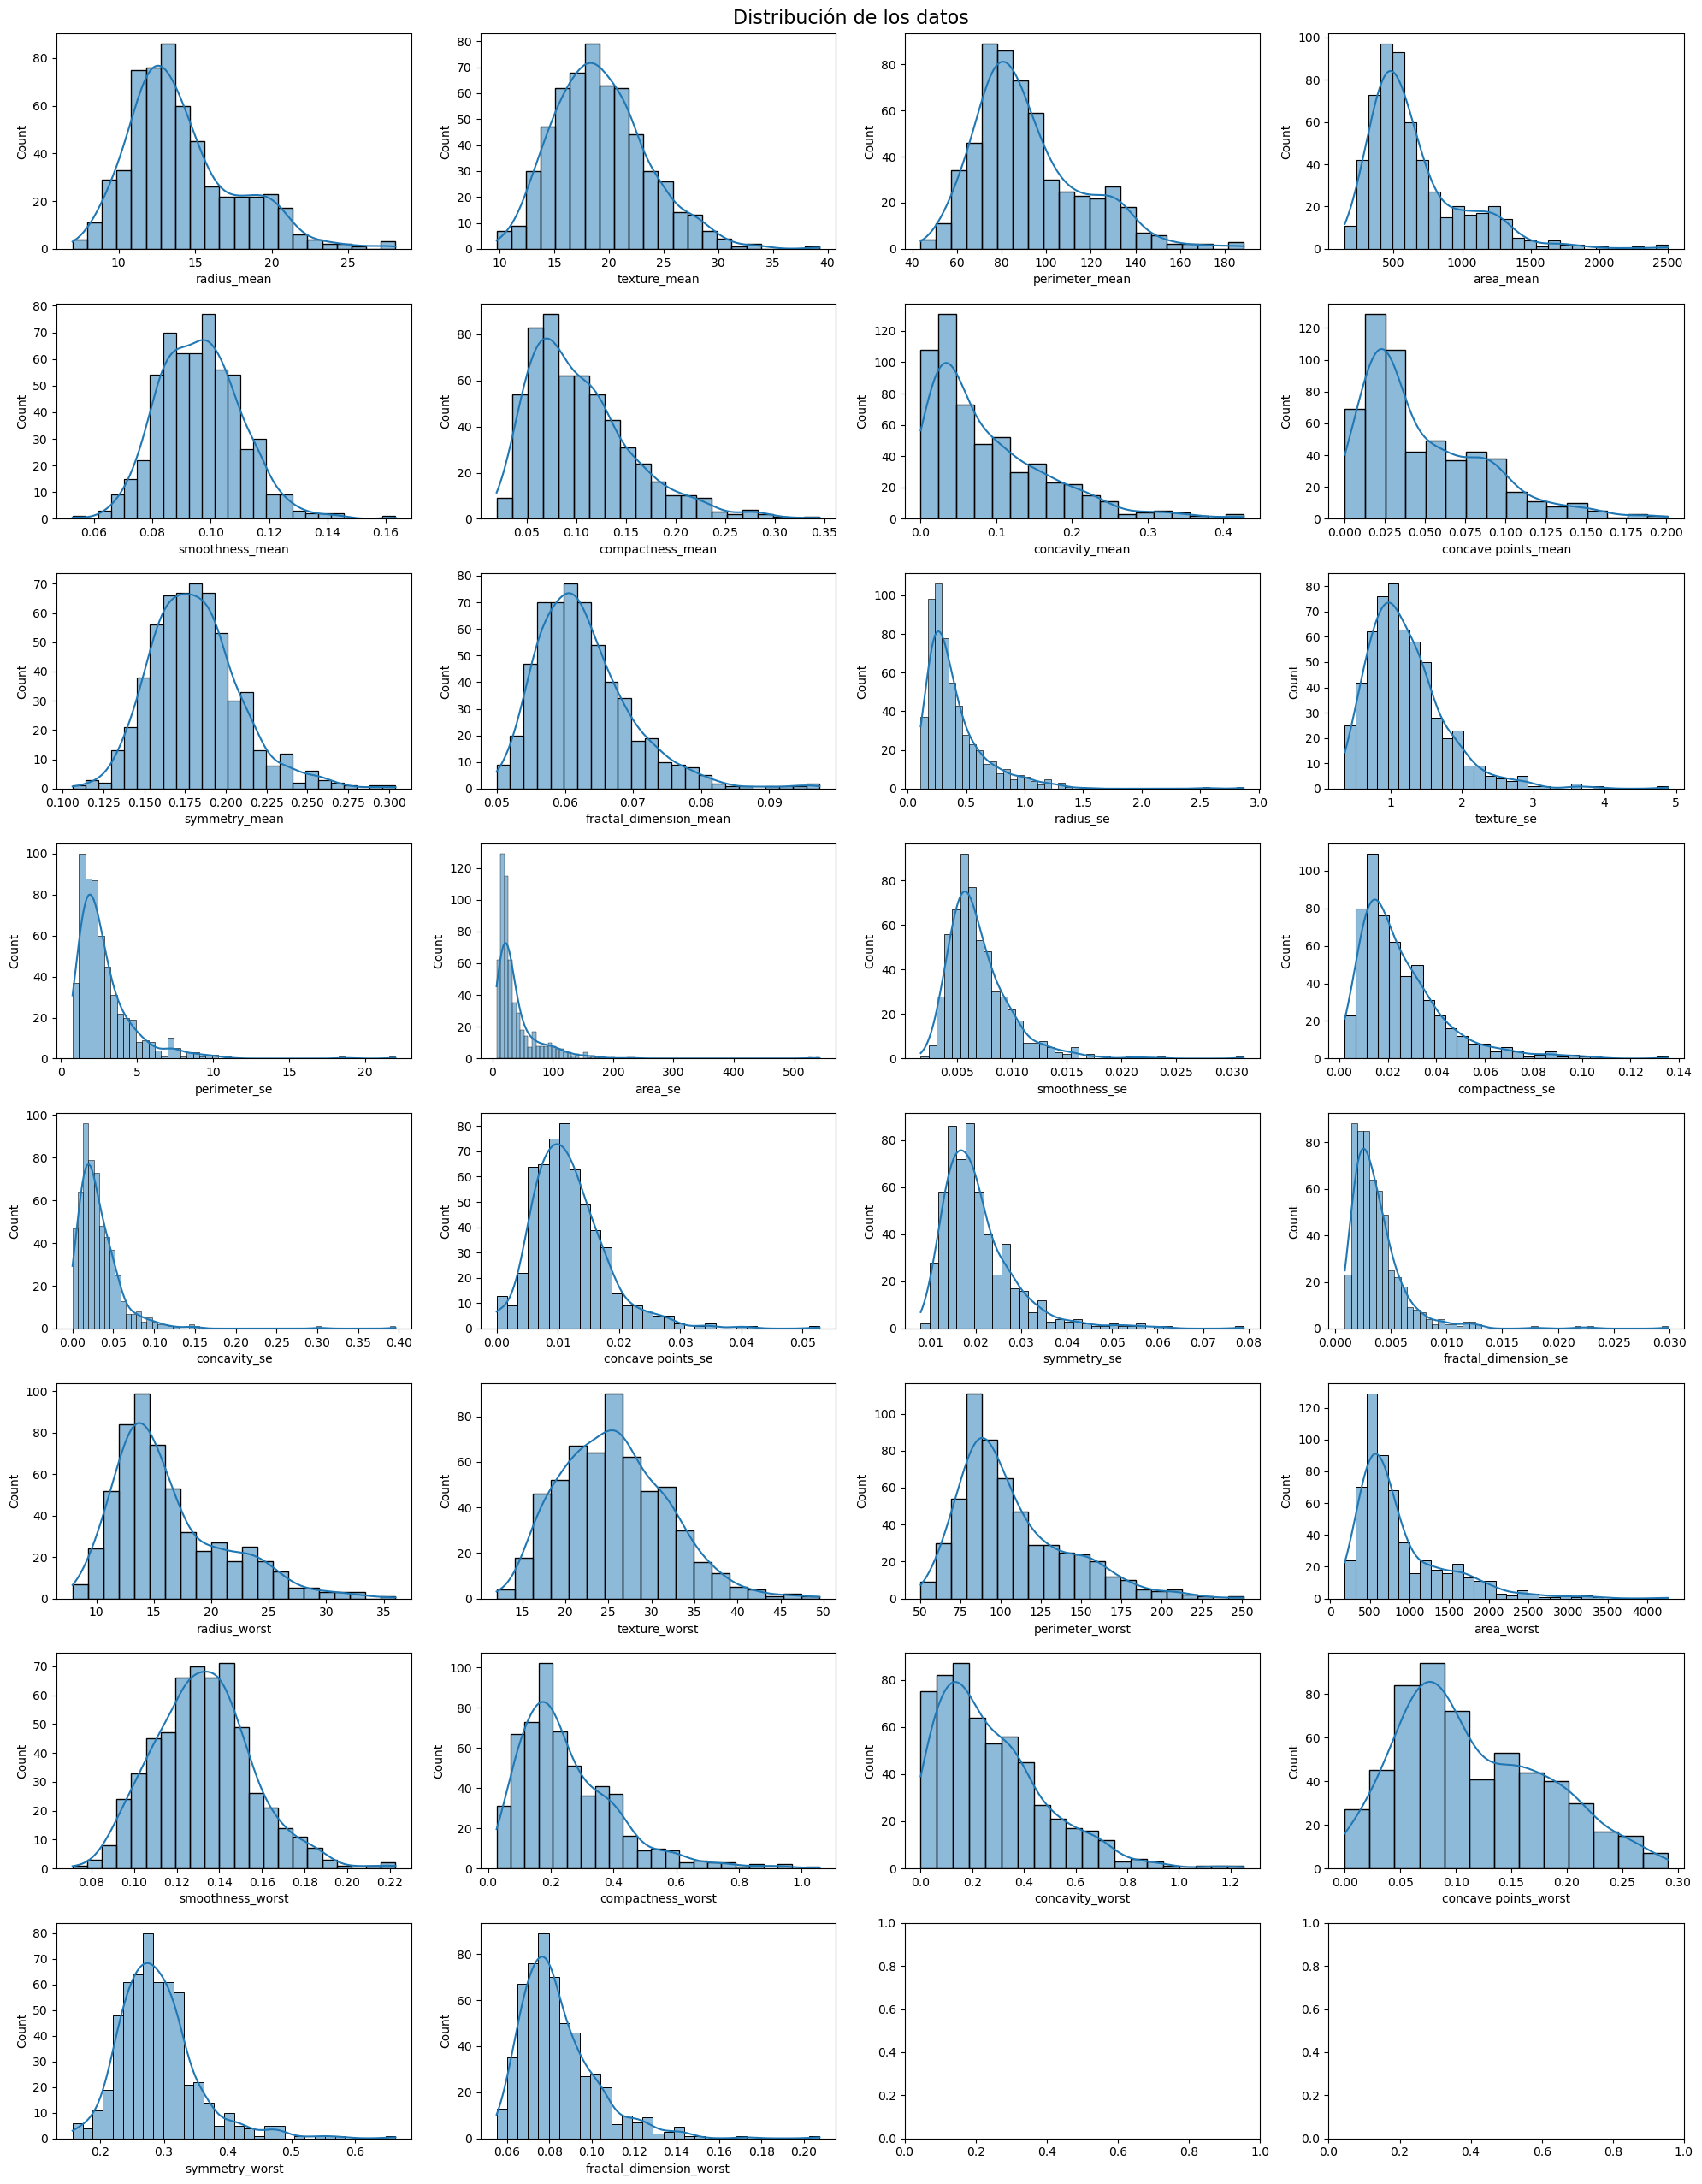

In [13]:
col_num = df.select_dtypes(include = np.number).columns
fig, ax = plt.subplots(8,4, figsize=(20,26))

for var, col in zip(col_num, ax.flatten()):
    sns.histplot(data=df, x= var, ax=col, kde = True)

fig.suptitle('Distribución de los datos\n', fontsize=16)
plt.tight_layout()
plt.show()

Al ver las gráficas, vemos que la mayoría de columnas tienen una distribución entre 0 y 10, pero hay otras columnas que tienen una distribución más amplia llegando hasta 1000, lo que hace que las variables necesiten una normalización para que el modelo no se vea afectado por estas variables.

### Análisis bivariado

Vamos a ver la relación que tienen las variables numéricas con la variable objetivo 'diagnosis' para ver si hay alguna diferencia significativa entre los dos tipos de cáncer.

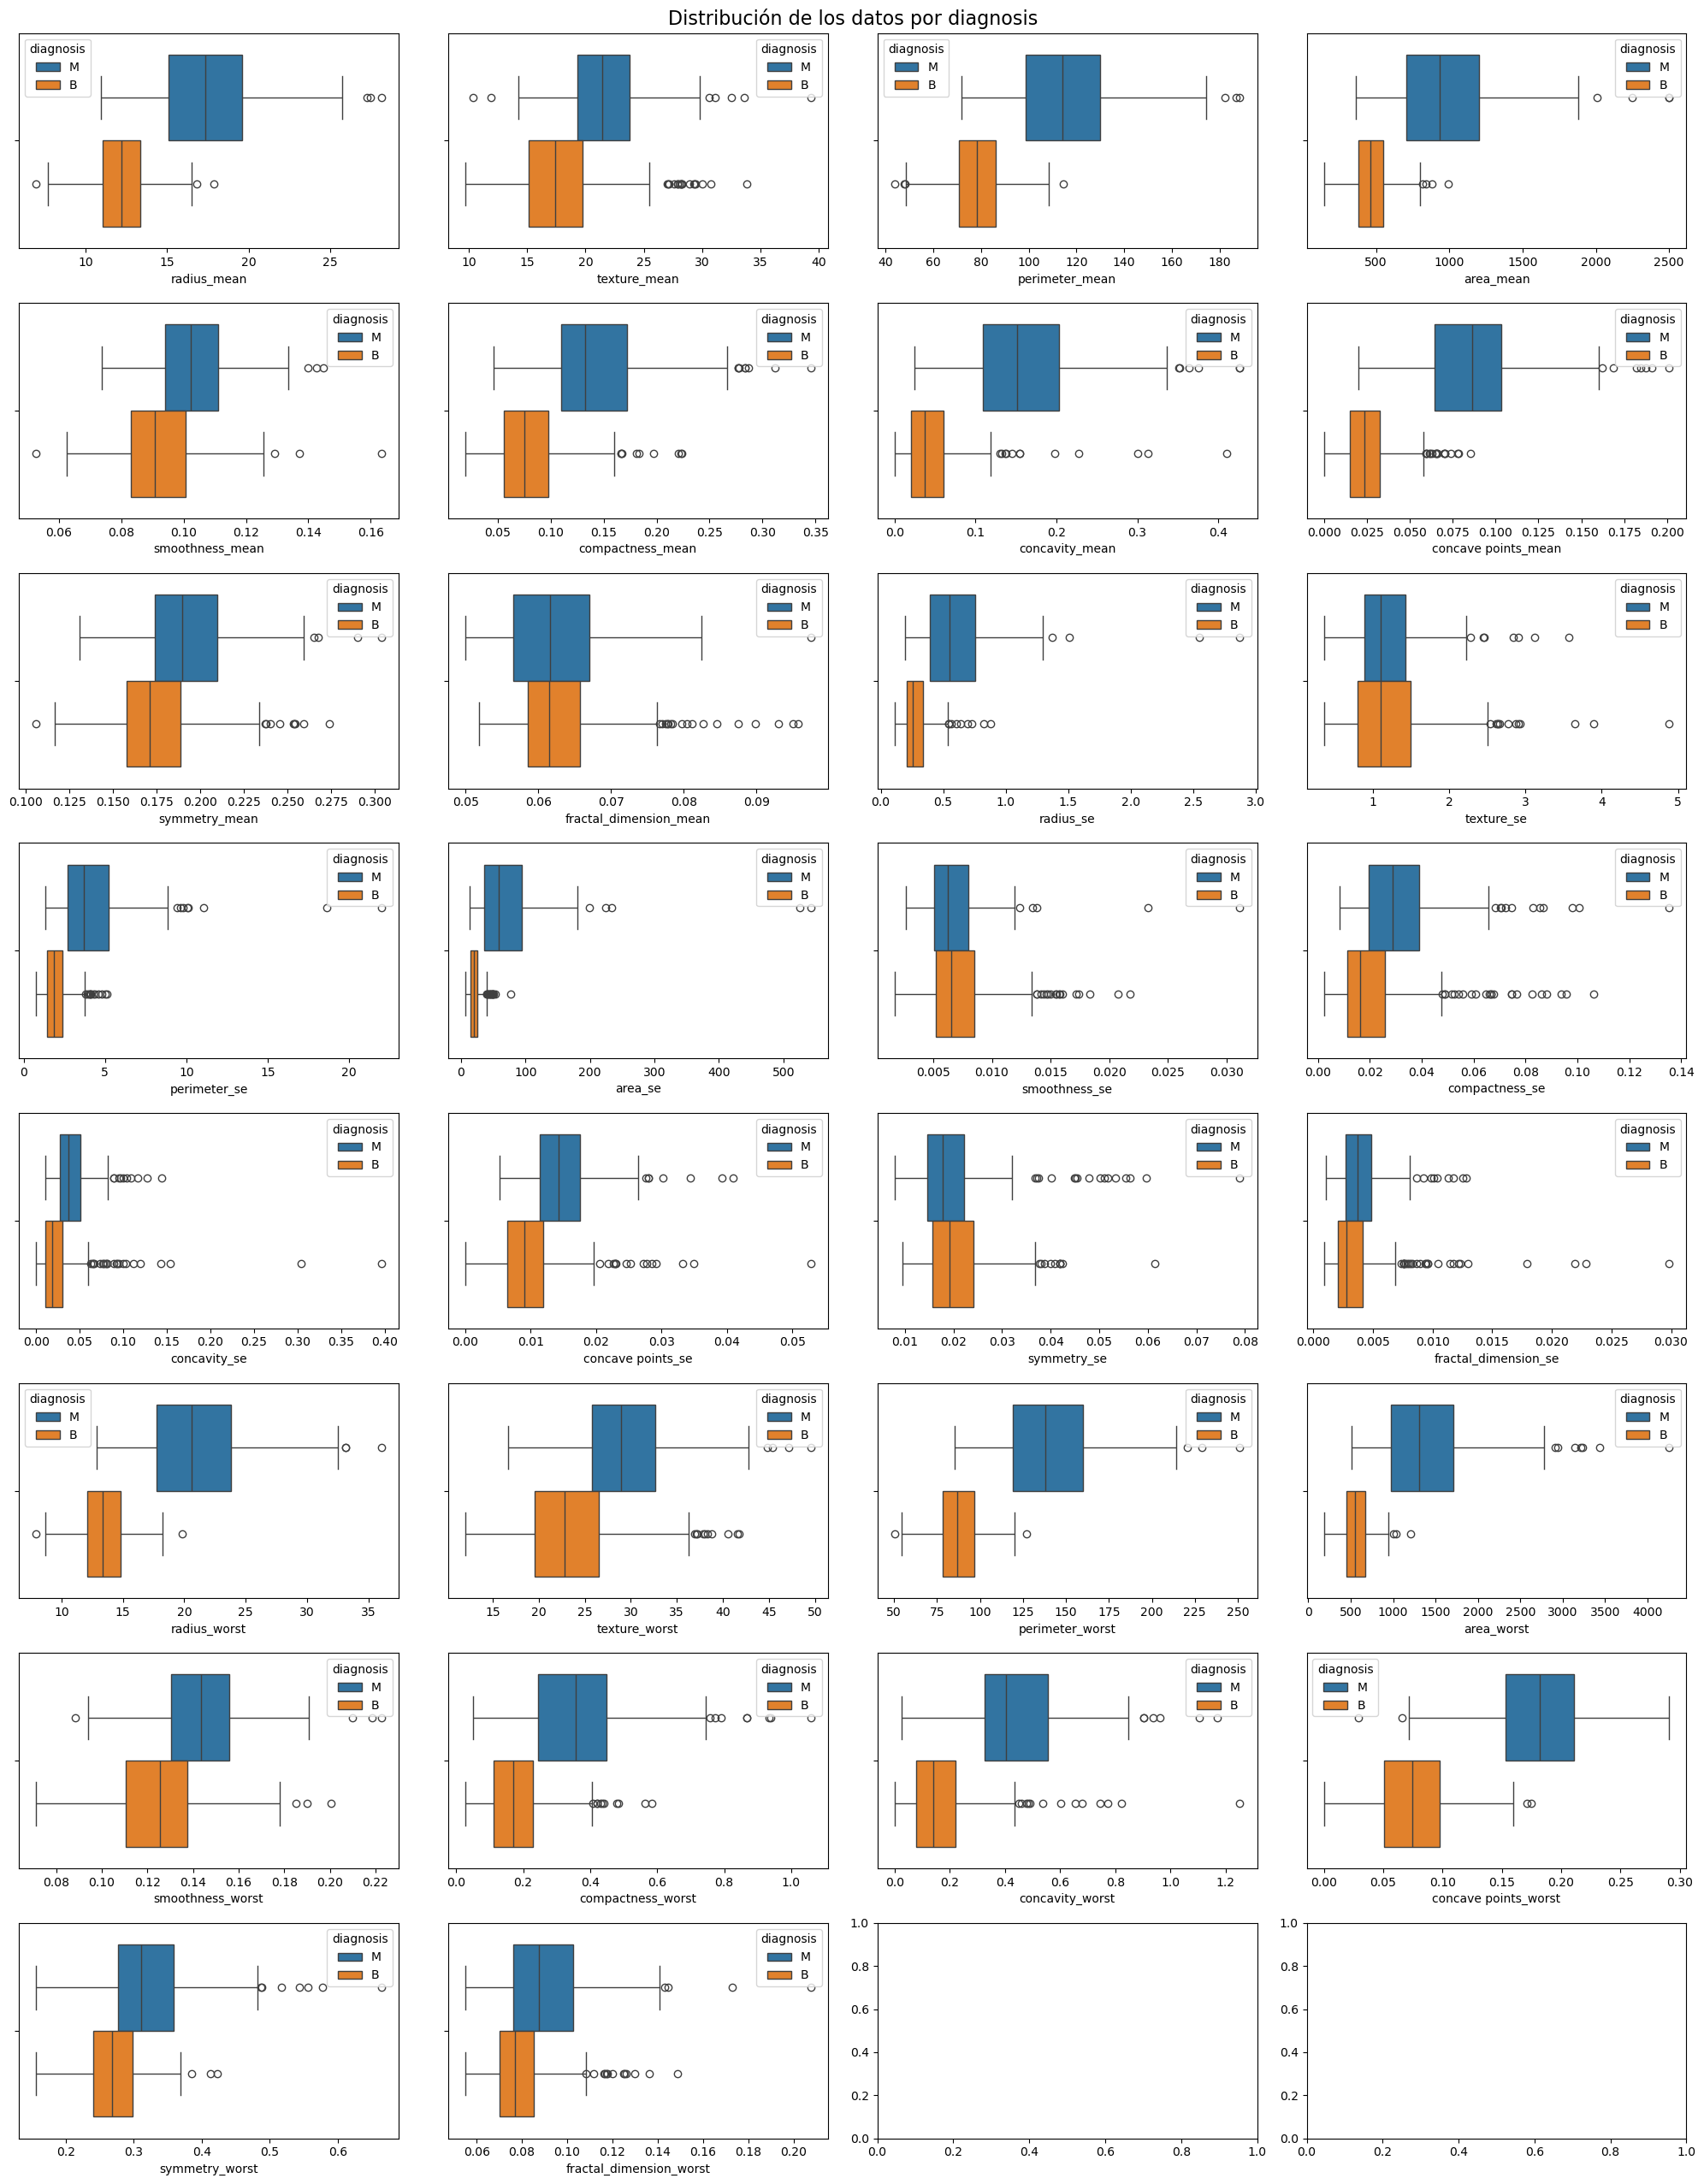

In [14]:
col_num = df.select_dtypes(include = np.number).columns
fig, ax = plt.subplots(8,4, figsize=(20,26))

for var, col in zip(col_num, ax.flatten()):
    sns.boxplot(data=df, x= var, hue = 'diagnosis',ax=col)

fig.suptitle('Distribución de los datos por diagnosis\n', fontsize=16)
plt.tight_layout()
plt.show()

Podemos notar que los tipos de cáncer tienen una distribución diferente entre sí, lo que nos ayudará a la hora de crear el modelo para predecir el tipo de cáncer y tener menor probabilidad de que el modelo confunda los tipos de cáncer. Además, en estas gráficas se observan varios outliers en cada variable, pero no les damos importancia ya que son datos médicos y representan casos reales que pueden ser relevantes para el modelo, por lo que no realizamos ninguna acción con ellos.

Ahora, la variable categórica 'diagnosis' la cambiaré a tipo numérica, esto con el fin de hacer un mapa de calor y ver exactamente qué tipo de relación tienen todas las variables con la variable objetivo.

In [15]:
df['diagnosis'].replace(to_replace='M', value=1, inplace=True)
df['diagnosis'].replace(to_replace='B', value=0, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_12196\2022911439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace(to_replace='M', value=1, inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_12196\2022911439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

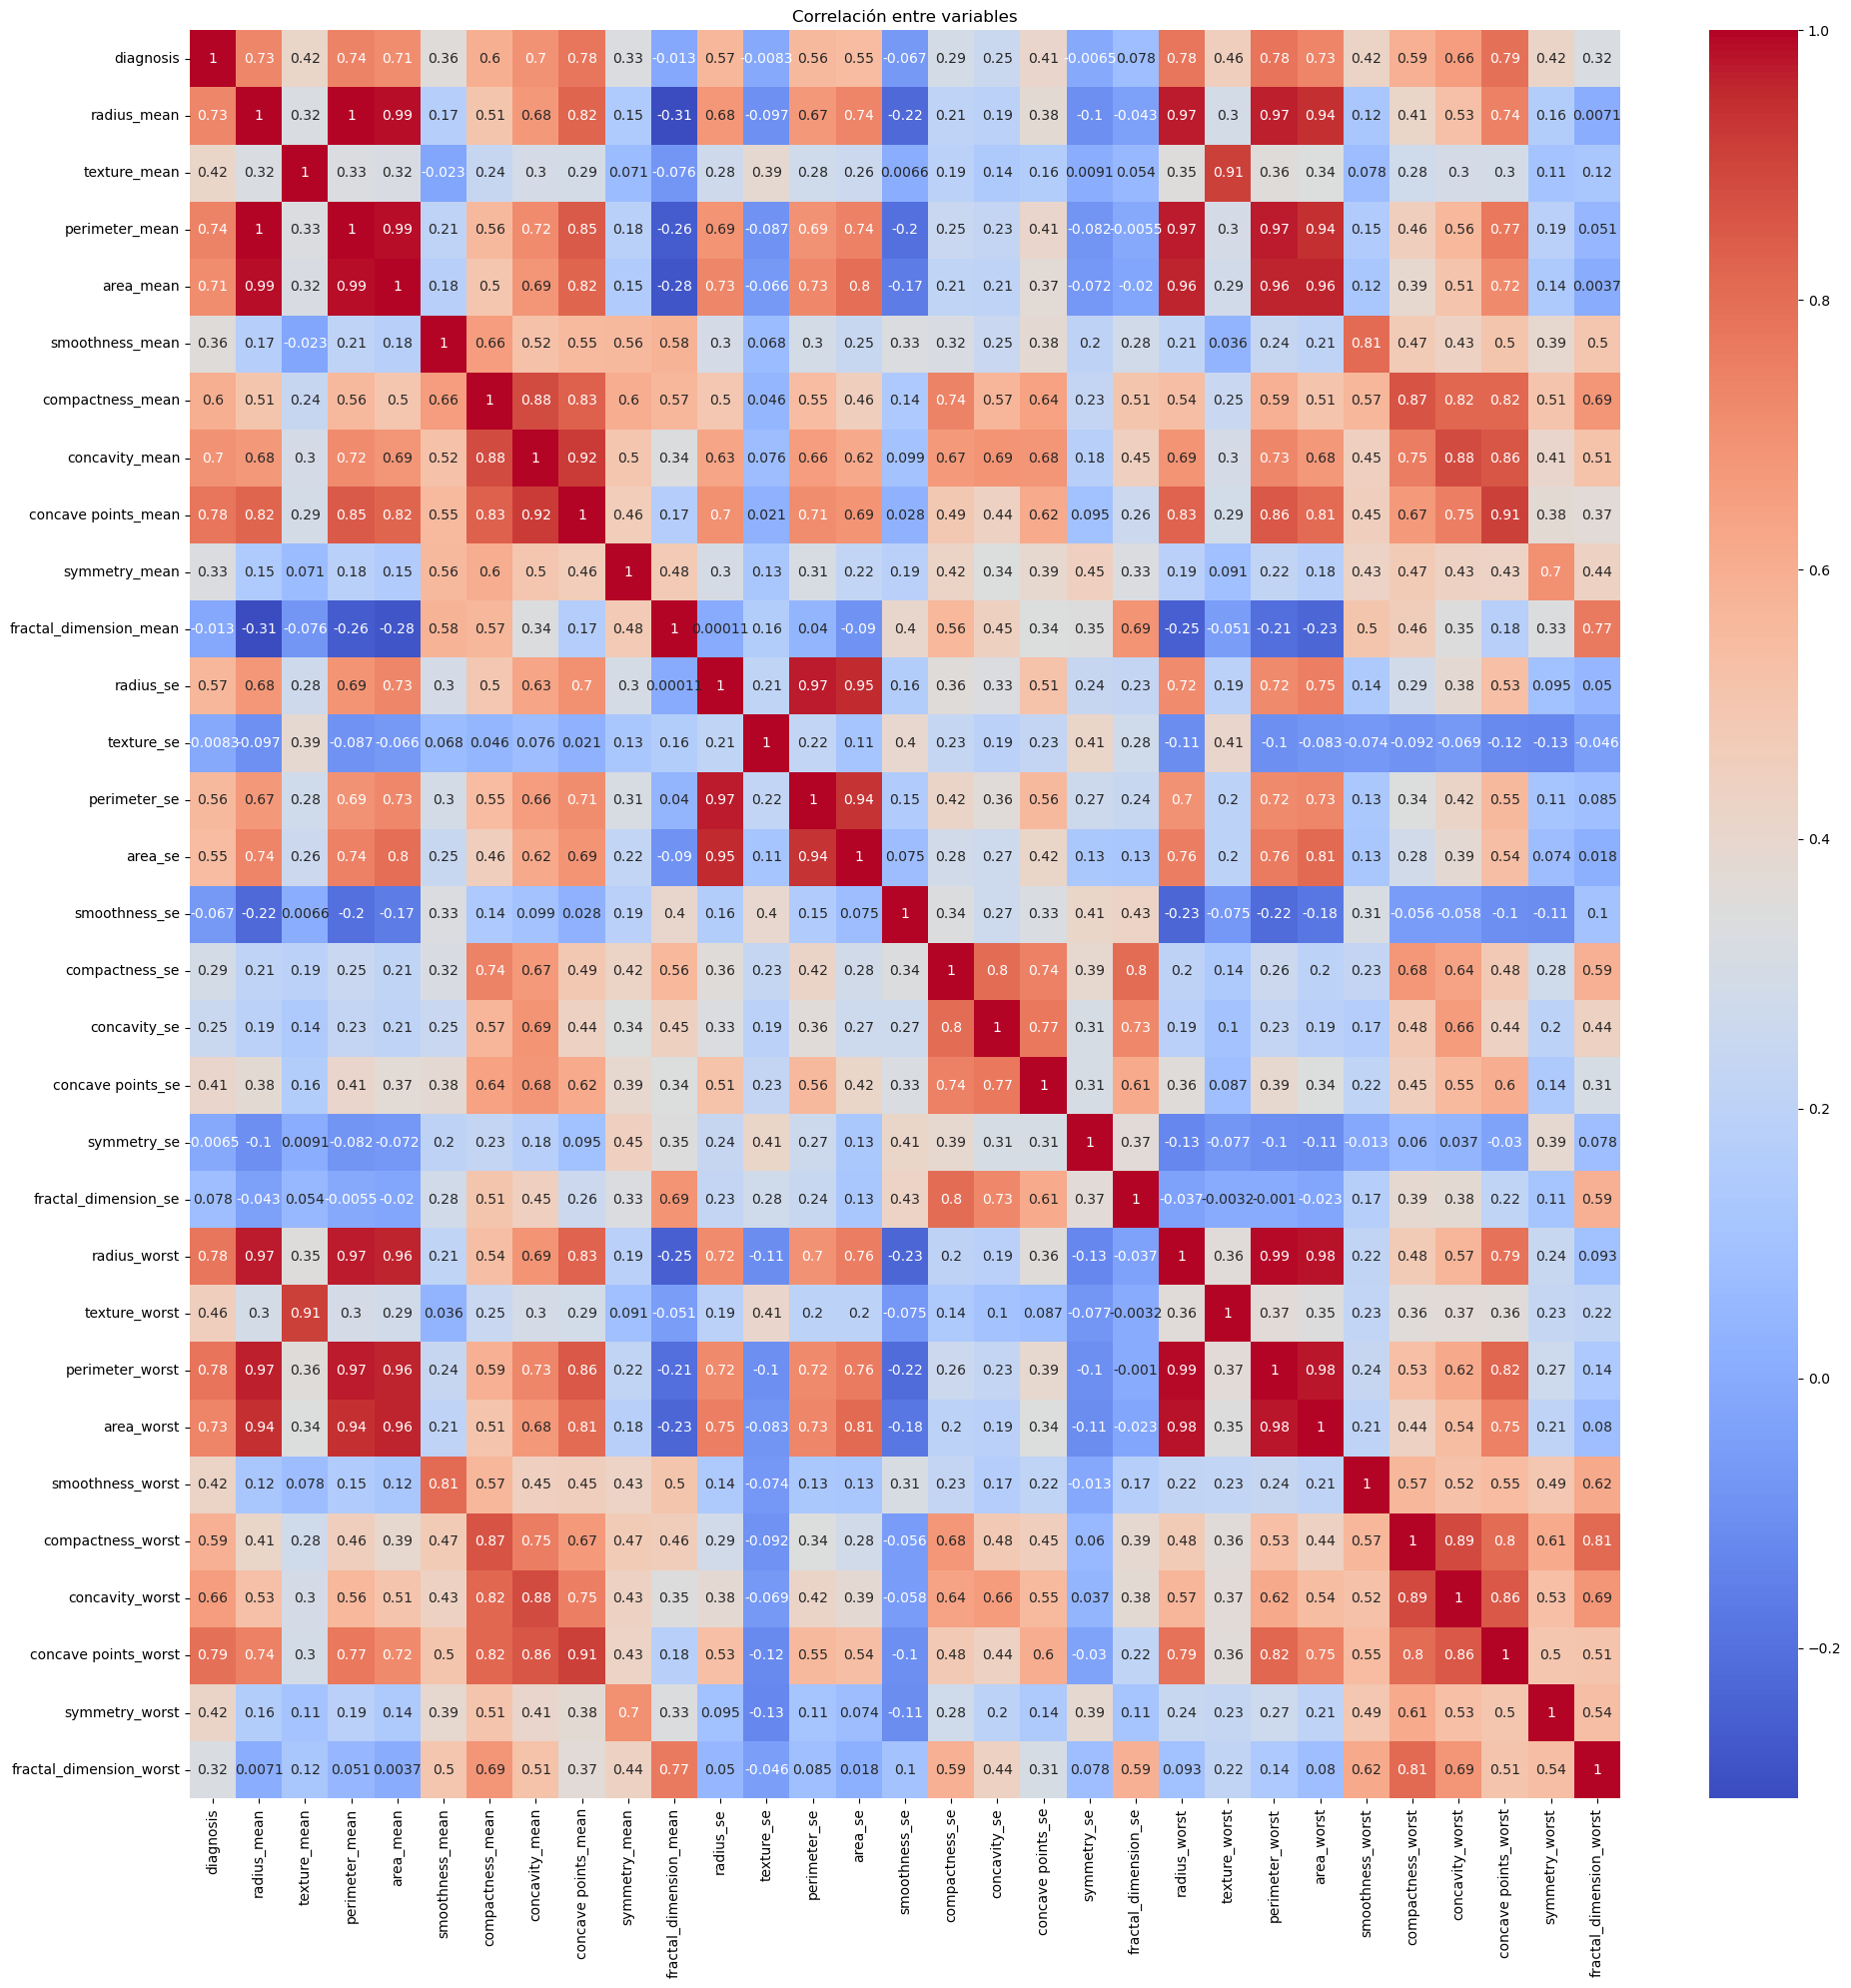

In [16]:
df_float = df.select_dtypes(include=np.number)
plt.figure(figsize=(20,20))
sns.heatmap(df_float.corr(), cmap = 'coolwarm',annot = True)
plt.title('Correlación entre variables')
plt.tight_layout()
plt.show()

En el mapa de calor, vemos como todas las variables tienen una correlacion positiva con la variable objetivo, pero tambien notamos que hay variables que tienen una correlación muy alta entre si, lo que puede traer problemas de multicolinealidad al momento de crear el modelo, por lo que se tendra que hacer una selección y eliminación de variables para evitar este problema.

Variables a eliminar por alta correlación (> 0.85): ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Shape original: (569, 31)
Shape reducido: (569, 18)


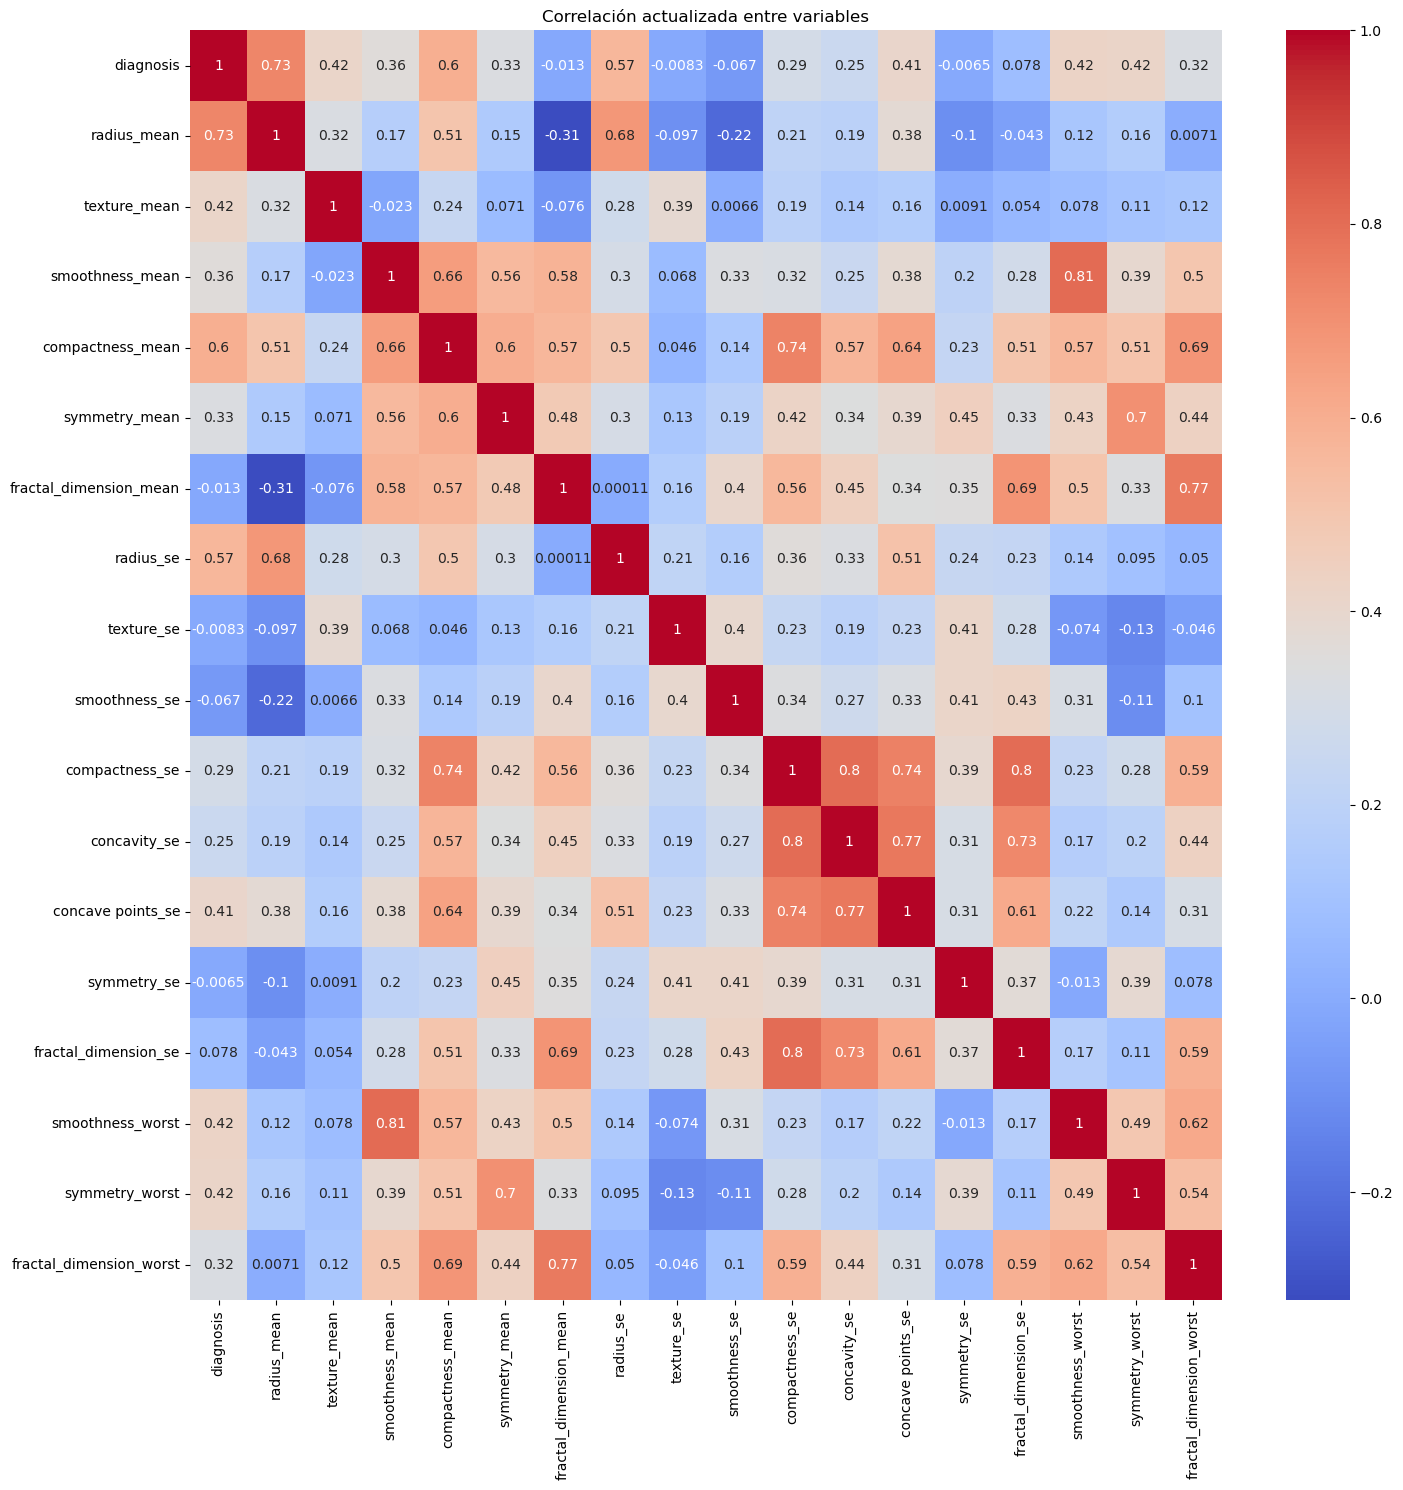

In [18]:
# Función para eliminar variables altamente correlacionadas
def remove_highly_correlated_features(df, threshold=0.9):

    df_numeric = df.select_dtypes(include=[np.number])    
    corr_matrix = df_numeric.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    print(f"Variables a eliminar por alta correlación (> {threshold}): {to_drop}")
    df_reduced = df.drop(columns=to_drop)
    return df_reduced

df_reduced = remove_highly_correlated_features(df, threshold=0.85)

print(f"Shape original: {df.shape}")
print(f"Shape reducido: {df_reduced.shape}")

plt.figure(figsize=(15,15))
sns.heatmap(df_reduced.select_dtypes(include=[np.number]).corr(), cmap = 'coolwarm',annot=True)
plt.title('Correlación actualizada entre variables')
plt.tight_layout()
plt.show()


Al hacer la selección de variables, se eliminaron las variables que tenían una correlación mayor a 0.85 entre sí para no tener problemas de sobreajuste con el modelo, dejando un total de 17 variables para crear el modelo.

In [19]:
df_processing = df_reduced.copy()

Ahora copiamos el dataset limpio a un nuevo dataframe para hacer el modelo de regresión logística.

## División de los datos

In [20]:
x = df_processing.drop('diagnosis', axis=1)  # Características sin escalar
y = df_processing['diagnosis'].values       # Objetivo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

print("Distribución original en train:", pd.Series(y_train).value_counts())
print("Distribución después de SMOTE:", pd.Series(y_train_sm).value_counts())


c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Distribución original en train: 0    286
1    169
Name: count, dtype: int64
Distribución después de SMOTE: 0    286
1    286
Name: count, dtype: int64


Como primer paso, se dividen los datos en variables independientes (X) y variable dependiente (y). Luego, se dividen los datos en conjuntos de entrenamiento y prueba, utilizando un 80% de los datos para entrenamiento y un 20% para prueba. También, se nivela la cantidad de datos entre las clases benigno y maligno para evitar el desbalance en los datos.

## Escalabilidad y Creación del modelo

In [21]:
# Escalado de datos y llamado del modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

# Ajuste de hiperparámetros
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1','l2'], 
    'model__solver': ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train_sm, y_train_sm)

best_model = grid_search.best_estimator_

c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\david\anaconda3\envs\cancer_prediction\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Después de separar los datos, se crea un pipeline que incluye el escalado de los datos utilizando StandardScaler y el modelo de regresión logística. También, se realiza un ajuste de hiperparámetros utilizando GridSearchCV para que el modelo tenga un mejor rendimiento.

## Evaluación del modelo

In [22]:
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

print("Mejores Parámetros:", grid_search.best_params_)
print('-----------------------------')
print("Precisión:", accuracy_score(y_test, y_pred))
print('-----------------------------')
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
print('-----------------------------')
print(classification_report(y_test, y_pred))

Mejores Parámetros: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'saga'}
-----------------------------
Precisión: 0.956140350877193
-----------------------------
AUC-ROC: 0.9957418932197838
-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1100x1100 with 0 Axes>

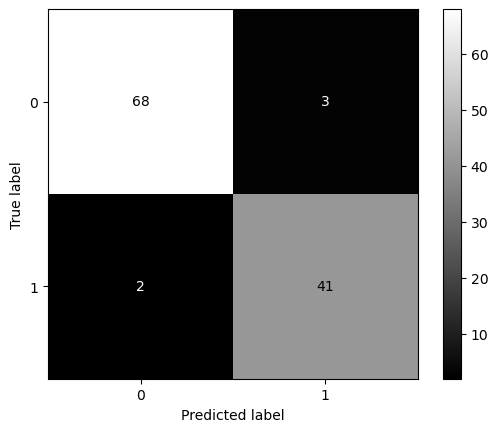

In [23]:
plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='gray')
plt.show()

Como vemos en las diferentes métricas, el modelo tiene un buen rendimiento en la predicción del tipo de cáncer, con una precisión del 95% y con la matriz de confusión podemos ver que el modelo es capaz de identificar correctamente la mayoría de los casos de cáncer maligno y benigno.

## Conclusión

Podemos concluir que el modelo de regresión logística es capaz de predecir con un buen rendimiento el tipo de cáncer maligno y benigno, con una precisión del 95%. Sin embargo, es importante tener en cuenta que el dataset original estaba desbalanceado, por lo que se tuvo que realizar un balanceo de las clases para evitar problemas en la predicción. Además, se eliminaron variables con alta correlación entre sí para evitar problemas de multicolinealidad. En general, el modelo es efectivo para predecir el tipo de cáncer, pero siempre es recomendable seguir investigando y explorar mejoras adicionales.